In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Naftaly\Downloads\Documents\loanapproval.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.size

55497

In [5]:
df.shape

(4269, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1    no_of_dependents         4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5    loan_amount              4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
df.isnull().sum()

loan_id                     0
 no_of_dependents           0
education                   0
self_employed               0
income_annum                0
 loan_amount                0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [9]:
df["education"].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [10]:
df["self_employed"].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [11]:
df["loan_status"].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

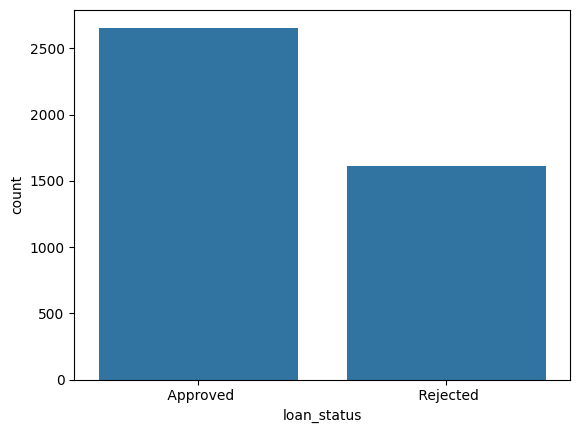

In [12]:
## Visualize target distribution

sns.countplot(x="loan_status", data=df)
plt.show()

In [13]:
## Dropping loan_id column

df.drop(columns=["loan_id"], inplace=True)

In [14]:
## Label Encoding The Target Variable

df["loan_status"] = df["loan_status"].str.strip().str.lower()
df["loan_status"] = df["loan_status"].map({"rejected": 0, "approved": 1})

In [15]:
df["loan_status"].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [16]:
## One-hot encoding the other categorical features i.e education and self_employed

df = pd.get_dummies(df, columns=["education", "self_employed"], drop_first=True)

In [17]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,False,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,False,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,True,True


In [18]:
df.columns

Index([' no_of_dependents', 'income_annum', ' loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'education_ Not Graduate', 'self_employed_ Yes'],
      dtype='object')

In [19]:
df["education_ Not Graduate"] = df["education_ Not Graduate"].astype(int)
df["self_employed_ Yes"] = df["self_employed_ Yes"].astype(int)

In [20]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,1


### Train-Test Split

In [21]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [22]:
## Stratified K-Fold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [24]:
numeric_features = [' no_of_dependents', 'income_annum', ' loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    
    # Cross-validation
    scores = cross_val_score(
        pipeline, 
        X[numeric_features], 
        y, 
        cv=skf, 
        scoring="accuracy"
    )
    
    print(f"{name} - CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression - CV Accuracy: 0.9166 ± 0.0050
Decision Tree - CV Accuracy: 0.9782 ± 0.0024
Random Forest - CV Accuracy: 0.9817 ± 0.0030
XGBoost - CV Accuracy: 0.9831 ± 0.0030


### Final Train-Test Split Using XGBoost

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X[numeric_features], y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", best_model)
])
pipeline.fit(X_train, y_train)

# Evaluating on the hold-out set
y_pred = pipeline.predict(X_test)
print("Hold-out Accuracy:", accuracy_score(y_test, y_pred))

Hold-out Accuracy: 0.9824355971896955


In [30]:
print("XGBoost: \n", classification_report(y_test, y_pred))

XGBoost: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



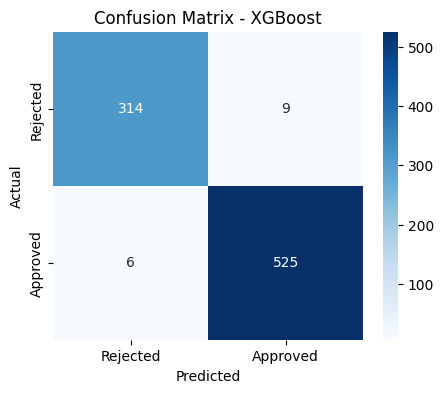

In [31]:
## Confusion Matrix
def plot_conf_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_conf_matrix(y_test, y_pred, "XGBoost")